# Векторные модели (начало)

Векторые представления лингвистических объектов (слов, предложений, текстов) являются одним из основных инструментов, используемых в компьютерной лингвистике. Чтобы решить любую NLP-задачу методами машинного обучения, необходимо представить корпус в виде векторов.

* $d \in D$ – документы
* $w \in V$ – словарь, всего слов |V|
    
### Виды векторизации

* Традиционное представление: одно слово – одна размерность в векторной модели: $\vec{d_i} = <f_1, ... , f_{|V|}> $
* $f$ – компоненты вектора – могут быть:
    * 0 и 1 (one-hot кодирование)
    * частотами
    * $tf-idf$ весами
    * весами из матрицы совместной встречаемости
* С использованием распределенных представлений слов *(word embeddings)*
* С использованием распределенных представлений текстов *(doc embeddings)*


## Счетные векторные модели


### Терм-документная матрица

**Терм-документная матрица** — матрица, которая описывает частоту «терминов» (т.е. слов) в коллекции документов. В терм-документной матрице строки соответствуют терминам, а столбцы — документам в коллекции. Что будет в ячейках матрицы зависит от способа векторизации:

* 0 и 1 при one-hot encoding
* абсолютная/относительная частота при модели мешка слов
* tf-idf веса

![td_matrix](./img/matrix.png)

### One-hot кодирование

Самый простой представить слова в векторном виде — проиндексировать их и закодировать векторами, в которых все компоненты будут равны 0, а компонента, соответствующая индексу слова, равна 1. Иначе говоря, мы работаем с матрицей $W$ размерности $k$, где $k$ это число уникальных слов в корпусе, а в рядах и столбцах находятся все эти слова. Мы ставим в ячейку матрицы 1, если слово в строке и колонке совпадает. 

![OneHot](http://1.bp.blogspot.com/-_c2pVR3A0HQ/VogUStUgFbI/AAAAAAAADQc/6V1M6zmAJmA/s1600/1-hot-vector.png)

Такое представление слов называется *one-hot encoding*. Оно может быть иногда полезно, когда мы хотим работать со словами как с категориальными признаками, но не несёт совершенно никакой информации о значении слов. 

### Мешок слов

**Мешок слов** *(bag of words, BoW)* — это векторная модель, где каждый документ или текст выглядит как неупорядоченный набор слов без сведений о связях между ними. Его можно представить в виде матрицы, каждая строка в которой соответствует отдельному документу или тексту, а каждый столбец — определенному слову. Ячейка на пересечении строки и столбца содержит *количество вхождений слова* в соответствующий документ.

Это значит, что каждое слово или каждая N-грамма задает свою координату в векторном пространстве и никаких дополнительных признаков – например, порядок слов – не использует. 

![bow](./img/bow.png)


## TF-IDF

Ещё один способ работы с текстовыми данными — [TF-IDF](https://en.wikipedia.org/wiki/Tf–idf) *(Term Frequency – Inverse Document Frequency)*. Tf-idf — это модификация мешка слов, которая позволяет учитывать «важность» слова в документе. 

Рассмотрим коллекцию текстов $D$.  Для каждого уникального слова $t$ из документа $d \in D$ вычислим следующие величины:

**1. Term Frequency** – количество вхождений слова в отношении к общему числу слов в тексте:

$$\text{tf}(t, d) = \frac{n_{td}}{\sum_{t \in d} n_{td}},$$

где $n_{td}$ — количество вхождений слова $t$ в текст $d$. 

То есть по сути это мешок слов, только частота здесь не абсолютная, а относительная (нормированная на длину текста).


**2. Inverse Document Frequency**

$$\text{idf}(t, D) = \log \frac{\left| D \right|}{\left| \{d\in D: t \in d\} \right|},$$

где $\left| \{d\in D: t \in d\} \right|$ – количество текстов в коллекции, содержащих слово $t$.

Значение $\text{tf}(t, d)$ корректируется для часто встречающихся общеупотребимых слов при помощи значения $\text{idf}(t, D).$  Если слово встречается в множестве документов, то idf будет близка к 1, а если оно встречается в одном документе или в небольшом количестве документов, то она будет гораздо выше.

**3. TF-IDF**

Тогда для каждой пары (слово, текст) $(t, d)$ вычислим величину:

$\text{tf-idf}(t,d, D) = \text{tf}(t, d)\cdot \text{idf}(t, D).$

Признаковым описанием одного объекта $d \in D$ будет вектор $\bigg(\text{tf-idf}(t,d, D)\bigg)_{t\in V}$, где $V$ – словарь всех слов, встречающихся в коллекции $D$.

Можно записать формулу расчета tf-idf вот так:


<img src="./img/tfidf.png" width="400" align="left">

## Совместная встречаемость слов

В предыдущих моделях мы никак не учитывали значение слова. Можно ли его как-то закодировать? Здесь к нам приходит на помощь лингвистическая теория, которая называется дистрибутивной гипотезой. Она утверждает, что значение слова определяется его контекстом — иначе говоря, словами, которые встречаются рядом с этим словом в тексте. Область лингвистики, которая занимается вычислением степени семантической близости между словами/текстами и т.п. на основании их распределения (дистрибуции) в больших массивах данных (текстовых корпусах) назвается **дистрибутивной семантикой**.

Давайте будет подразумевать под контекстом некоторое число $n$ слева и справа от слова. Это число будем называть *окном*. К примеру, в предложении "мама мыла раму" окном размера 1 для слова "мыла" будет набор слов ("мама", "раму").

Пусть теперь мы будем ставить в ячейку 1, если слово из *колонки* хоть раз встретилось внутри окна вокруг слова из *строки* во всём корпусе. Такая матрица называется **бинарной матрицей совместной встречаемости**, и она уже что-то говорит о значении слов. Тем не менее, с помощью неё все ещё трудно отличить слова, которые часто встречаются в похожих контекстах. Здесь довольно логичным кажется переход от бинарных значений к собственно количеству появлений слова $w_1$ в контексте слова $w_2$: иначе говоря, сколько раз в корпусе слово "мыла" встретилась рядом со словом "мама". 

Допустим, у нас есть следующие предложения:

* *Мама мыла раму*
* *Мама мыла окно*
* *Мама мыла Машу*
* *Маша мыла окно*

Построим на их основе (небинарную) матрицу совместной встречаемости слов c окном размера 1. В строках и столбцах матрицы — слова из нашего словаря, а на пересечении — количество их употреблений в заданном окне по всему корпусу. В итоге строка, соответствующая тому или иному слову из словаря — это его вектор.

w |Мама|мыла|раму|окно|Машу|Маша|
:-|:---:|:----:|:----:|:----:|:----:|:----:|
**Мама**|0|3|0|0|0|0|
**мыла**|3|0|1|2|1|0|
**раму**|0|1|0|0|0|0|
**окно**|0|2|0|0|0|0|
**Машу**|0|1|0|0|0|0|
**Маша**|0|1|0|0|0|0|

Картинка ниже иллюстрирует, что вектора слов, построенные на основе матрицы совместной встречаемости, будут сходны у слов, которые встречаются в похожих контекстах (в данном случае — food и eat, на которые совсем не похож laptop).

![Binary](http://4.bp.blogspot.com/-JHmQeFhqgCU/VogqxZ2UdhI/AAAAAAAADQs/-rJ0QYDn_ws/s1600/distributional.png)


### Метрики вероятности совместной встречаемости слов

Бинарная и частотная матрицы — это самые простые способы получения информации о контексте слова. Они не очень эффективны и не используют информацию о том, насколько характерно для данного документа само употребление слов в контексте.

Метрика, которая лучше фиксирует эту информацию, называется **PMI** *(Pointwise Mutual Information)*. Вес связи между двумя словами здесь определяется тем, насколько чаще они встречаются в корпусе вместе, чем если бы мы ожидали, что они появляются случайно. Иначе говоря, это мера того, как часто встречаются две случайные величины $w$ и $c$, по сравнению с тем, что мы ожидали бы, если бы они были независимыми:

$$PMI_{w, c} =  \log_2 \frac{P(w, c)}{P(w)P(c)}.$$

Значения PMI варьируются от -$\infty$ до $\infty$. Но отрицательные значения PMI, как правило, ненадежны: они говорят о том, что слова вместе встречаются реже, чем случайно. И если у нас нет очень большого корпуса, то эти редко встречающиеся пары слов будут зашумлять наши данные. По этой причине всегда лучше использовать метрику Positive PMI (сокращённо PPMI), которая заменяет все отрицательные значения PMI на ноль.

$$PPMI_{w, c} = \max(PMI_{w, c}, 0) = PMI_{w, c}^+$$

# Задача классификации в NLP

## Виды

1. Бинарная классификация: $C = \{0, 1\}$ 
2. Многоклассовая классификация [multiclass classification]: $C = \{0, ..., K\}$
3. Многотемная классификация [multi-label classification]: $C = \{0,1\}^K$


* $d \in D$ – документы
* $c \in C$ – классы 

## Примеры

* Фильтрация спама: $C = \{spam, ham\}$ – бинарная классификация
* Классификация по тональности: $C =  \{neutral, positive, negative\}$ – классификация с тремя классами
* Рубрикация: $C \in \{религия, праздники, спорт, фестивали, ... \}$ – классификация на несколько тем
* Определение авторства:
    * Этим ли автором написан текст: $ C = \{0, 1\}$?
    * Кем из этих авторов написан текст: $ C = \{a_1, a_2, a_3, ... \}$?
    * Пол автора: $ C = \{f, m\}$
    
## Методы

### По правилам

* Если в предложении встречается личное местоимение первого лица и глагол с окончанием женского рода, то пол автора = $f$.
* Если доля положительно окрашенных прилагательтельных в отзыве больше доли отрицательно окрашенных прилагательных, то отзыв относится к классу $posititive$.

### С использованием алгоритмов машинного обучения 

$ \gamma : D \rightarrow C$ - алгоритм классификации

$({D^{train}, C^{train}})$ – обучающее множество 

$({D^{test}, C^{test}})$ – тестовое множество 

## Метод наивного Байеса  (Multinomial naive Bayes classifier)

Требуется оценить вероятность принадлежности документа $d \in D$ классу $c \in C$: $p(c|d)$. Каждый документ –  мешок слов, всего слов $|V|$.
	
* $p(c)$ – априорная вероятность класса $c$
* $p(c|d)$ – апостериорная вероятность класса $c$
* $ p(c|d) = \frac{p(d|c)p(c)}{p(d)} $


В мультиномиальной байесовской модели документ – это последовательность событий. Каждое событие – этослучайный выбор одного слова из мешка слов. Когда мы подсчитываем правдоподобие документа, мы перемножаем вероятности того, что мы достали из мешка те самые слова, которые встретились в документе. 

Наивное предположение в том, что мы достаём из мешка разные слова независимо друг от друга, т.е. вероятности признаков внутри класса независимы.

Получается мультиномиальная генеративная модель, которая учитывает количество повторений каждого слова, но не учитывает порядок этих слов, а также каких слов нет в документе.

* [Подробнее о различных видах байесовских классификаторов](https://logic.pdmi.ras.ru/~sergey/teaching/mlaptu11/03-classifiers.pdf).
* [Слайды Дмитрия Игнатова про классификацию](https://cs.hse.ru/data/2016/04/13/1129765566/Classification.pdf)

# Задание №1

## Определение языка

Необходимо решить задачу определения языка на коллекции из 383,108 текстов на 26 языках с помощью наивного байесовского классификатора. Влияет ли способ векторизации на результаты? Сильно ли меняется качество классификации при изменении различных параметров векторизатора и классификатора? Как можно оценить качество работы модели? Необходимо также визуализировать результаты (например, построить матрицу ошибок).

Чтобы класиифицировать тексты, нужно сначала их векторизовать. В `sklearn` реализованы, например, [модель мешка слов](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html#sklearn.feature_extraction.text.CountVectorizer) (`CountVectorizer`) и [tf-idf](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) (`TfidfVectorizer`).

Основные параметры:

* lowercase: приводить к нижнему регистру или нет
* ngram_range: например, (1, 3) значит, что будут использованы униграммы, биграммы и триграммы
* analyzer: ‘word’ (слова), ‘char’ (символы), ‘char_wb’ (символы только внутри границ слова)
* tokenizer: можно использовать свой токенизатор, а не встроенный
* token_pattern: для встроенного токенизатора можно задать понятие токена в виде регулярки
* stop_words: список стоп-слов, по умолчанию None
* max_df: максимальная документная частота, от 0.0 до 1.0
* min_df: минимальная документная частота, целое число (например, если min_df=5, то будут учитываться только слова, которые встречаются 5 и более раз)

### Подготовка данных

Для начала посмотрим на [данные](https://www.dropbox.com/s/bybdr0a3fod1j1a/data-lang-id.txt?dl=0). Первая колонка здесь – метка класса (язык), вторая – текст, а разделены они табуляцией.

In [1]:
from sklearn.feature_extraction.text import *
from sklearn.metrics import *
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [3]:
import pandas as pd

data = pd.read_csv('./data/data-lang-id.txt', sep='\t')
data.head()

,lang,text
0,ru,Притом же это республиканское устройство бурсы...
1,ru,"Ты упомянул о том, что могло бы привести меня ..."
2,uk,"«Отже йому і спиться, і байдуже — хропе собі!...."
3,pl,"Kiedy słońce, odchodząc za horyzont, poczęło w..."
4,ru,"Странник выудил их всех, всех до единого, и с ..."


In [4]:
data.groupby('lang').count()

,text
lang,
be,14855
bg,14880
cs,1787
de,17509
el,223
en,71581
es,767
fr,9354
hr,1734


In [5]:
# что-то не так...
data.count()

lang    383111
text    383108
dtype: int64

In [6]:
# выкинем строки, в которых есть пустые значения
# и переназначим индексы

data.dropna(inplace=True)
data.reset_index(drop=True, inplace=True)
data.count()

lang    383108
text    383108
dtype: int64

Теперь нужно разбить данные на тренировочную и тестовую выборку. Кажется, они уже перемешаны, но на всякий случай перемешаем их перед разбиением еще раз.

In [7]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

data = shuffle(data)

train, test = train_test_split(data, test_size=0.2)
train.tail()

,lang,text
6253,en,"Well, I guess it was a standoff and they made ..."
369947,sv,"Och han föreställde sig, hur han skulle säga t..."
292450,ru,"Я хочу быть с вами. Но вы, Селена, вы останет..."
114335,uk,"Стара засовалася на місці, мов її що вкусило, ..."
235523,en,"“If there is a God,” he exclaimed excitedly, “..."


Векторизуем данные и обучаем классификатор.

In [8]:
vectorizer = CountVectorizer(ngram_range=(1,1))
classifier = MultinomialNB()

clf = Pipeline([
    ('vect', vectorizer),
    ('clf', classifier),
])

%time clf.fit(train.text, train.lang)

CPU times: user 33 s, sys: 1.45 s, total: 34.5 s
Wall time: 36.5 s


Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)), ('clf', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

Смотрим показания классификатора на тестовом множестве. 

In [9]:
predictions = clf.predict(test.text)

Оцениваем качество.

In [10]:
# макро-усреднение
print("Precision: {0:6.2f}".format(precision_score(test.lang, predictions, average='macro')))
print("Recall: {0:6.2f}".format(recall_score(test.lang, predictions, average='macro')))
print("F1-measure: {0:6.2f}".format(f1_score(test.lang, predictions, average='macro')))

print("...")

#микро-усреднение
print("Precision: {0:6.2f}".format(precision_score(test.lang, predictions, average='micro')))
print("Recall: {0:6.2f}".format(recall_score(test.lang, predictions, average='micro')))
print("F1-measure: {0:6.2f}".format(f1_score(test.lang, predictions, average='micro')))

print("...")

# accuracy
print("Accuracy: {0:6.2f}".format(accuracy_score(test.lang, predictions)))

Precision:   1.00
Recall:   0.99
F1-measure:   0.99
...
Precision:   1.00
Recall:   1.00
F1-measure:   1.00
...
Accuracy:   1.00


In [11]:
print(classification_report(test.lang, predictions))

             precision    recall  f1-score   support

         be       1.00      1.00      1.00      3014
         bg       1.00      1.00      1.00      2998
         cs       1.00      0.99      1.00       346
         de       1.00      1.00      1.00      3517
         el       0.98      1.00      0.99        51
         en       1.00      1.00      1.00     14287
         es       1.00      1.00      1.00       160
         fr       1.00      1.00      1.00      1854
         hr       0.90      1.00      0.95       381
        hsb       1.00      1.00      1.00        31
         hy       1.00      1.00      1.00       925
         it       1.00      1.00      1.00       671
         la       1.00      1.00      1.00       118
         lt       1.00      1.00      1.00        26
         lv       1.00      1.00      1.00       502
         mk       1.00      1.00      1.00       354
         nl       1.00      1.00      1.00       426
         pl       1.00      1.00      1.00   

Визуализируем результаты (например, в виде матрицы ошибок).

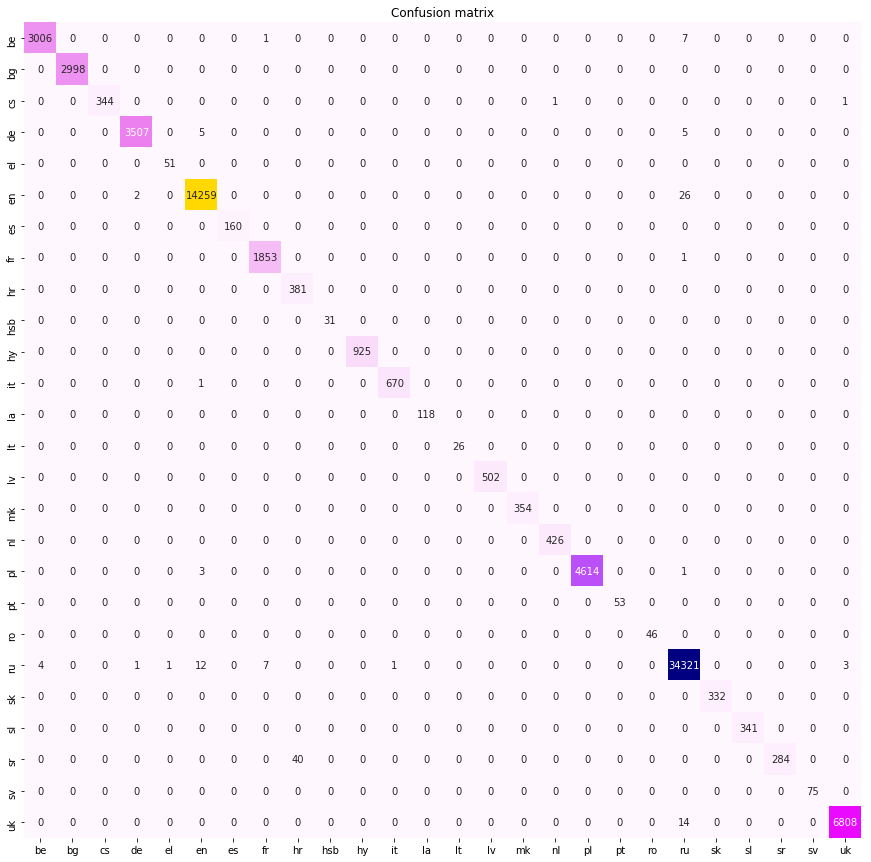

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

m = confusion_matrix(test.lang, predictions)

labels = clf.classes_
plt.figure(figsize = (15,15))
sns.heatmap(data=m, annot=True, fmt="d", cbar=False, xticklabels=labels, yticklabels=labels, cmap="gist_ncar_r")
plt.title("Confusion matrix")
plt.show()

## Важность признаков

Веса признаков в линейной модели в случае, если признаки отмасштабированы, характеризуют степень их влияния на значение целевой переменной. В задаче классификации текстов, кроме того, признаки являются хорошо интерпретируемыми, поскольку каждый из них соответствует конкретному слову. Изучим влияние конкретных слов на значение целевой переменной.

In [13]:
f_weights = zip(vectorizer.get_feature_names(), classifier.coef_[0])
f_weights = sorted(f_weights, key=lambda i: i[1])
for i in range(1,30):
    print('%s, %.2f' % f_weights[-i])
    
print('...')
for i in reversed(range(1,10)):
    print('%s, %.2f' % f_weights[i])

не, -4.67
на, -4.82
што, -5.13
ён, -5.53
як, -5.68
яго, -5.77
да, -5.79
за, -5.97
але, -6.04
гэта, -6.13
па, -6.15
ад, -6.33
яна, -6.33
было, -6.39
калі, -6.43
ты, -6.47
яе, -6.49
так, -6.58
яшчэ, -6.63
каб, -6.64
яны, -6.66
толькі, -6.66
быў, -6.83
іх, -6.83
тут, -6.84
мяне, -6.89
пра, -6.92
пад, -6.93
сказаў, -6.94
...
04, -14.49
03, -14.49
025, -14.49
016, -14.49
015, -14.49
011, -14.49
0083, -14.49
007, -14.49
003, -14.49


# Задание №2

## Классификация новостей по темам

Необходимо скачать датасет [20newsgroups](https://scikit-learn.org/0.19/datasets/twenty_newsgroups.html), выбрать несколько тем (не меньше 4, можно и все) и проделать то же самое с ними. В данном случае предсказывать мы будем тему новости, и, поскольку эта задача сложнее, можно сравнить качество при использовании лемматизации и без, при удалении стоп-слов и без, при разных способах векторизации (пока используем только счетные модели). Также необходимо сравнить разные методы классификации (хватит тех, что реализованы в sklearn), т.е. попробовать не только NB, но и логистическую регрессию, случайный лес и т.д.

### Как загрузить 20newsgroups

In [74]:
from sklearn.datasets import fetch_20newsgroups

cats = [
    'alt.atheism',
    'talk.religion.misc',
    'comp.graphics',
    'sci.space',
]

print("Loading 20 newsgroups dataset for categories:")
print(cats)

dataset = fetch_20newsgroups(subset='all', categories=cats,
                             shuffle=True, random_state=42)

print("%d documents" % len(dataset.data))
print("%d categories" % len(dataset.target_names))

data = dataset.data
labels = dataset.target

Loading 20 newsgroups dataset for categories:
['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']
3387 documents
4 categories


In [75]:
labels[:10]

array([0, 1, 1, 3, 1, 1, 2, 2, 2, 0], dtype=int64)

In [76]:
for i in labels[:10]:
    print(dataset.target_names[i])

alt.atheism
comp.graphics
comp.graphics
talk.religion.misc
comp.graphics
comp.graphics
sci.space
sci.space
sci.space
alt.atheism


In [77]:
print(data[0])

From: healta@saturn.wwc.edu (Tammy R Healy)
Subject: Re: who are we to judge, Bobby?
Lines: 38
Organization: Walla Walla College
Lines: 38

In article <1993Apr14.213356.22176@ultb.isc.rit.edu> snm6394@ultb.isc.rit.edu (S.N. Mozumder ) writes:
>From: snm6394@ultb.isc.rit.edu (S.N. Mozumder )
>Subject: Re: who are we to judge, Bobby?
>Date: Wed, 14 Apr 1993 21:33:56 GMT
>In article <healta.56.734556346@saturn.wwc.edu> healta@saturn.wwc.edu (TAMMY R HEALY) writes:
>>Bobby,
>>
>>I would like to take the liberty to quote from a Christian writer named 
>>Ellen G. White.  I hope that what she said will help you to edit your 
>>remarks in this group in the future.
>>
>>"Do not set yourself as a standard.  Do not make your opinions, your views 
>>of duty, your interpretations of scripture, a criterion for others and in 
>>your heart condemn them if they do not come up to your ideal."
>>                         Thoughts Fromthe Mount of Blessing p. 124
>>
>>I hope quoting this doesn't make the a